In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('file:///C:/Users/test/Downloads/DivarHousePrice.csv')

In [3]:
#LabelEncoding
label_encoder = LabelEncoder()
data['Address'] = label_encoder.fit_transform(data['Address'])
print(data.head())


  Area  Room  Parking  Warehouse  Elevator  Address         Price  Price(USD)
0   63     1     True       True      True      156  1.850000e+09    61666.67
1   60     1     True       True      True      156  1.850000e+09    61666.67
2   79     2     True       True      True      117  5.500000e+08    18333.33
3   95     2     True       True      True      152  9.025000e+08    30083.33
4  123     2     True       True      True      150  7.000000e+09   233333.33


In [4]:
for col in data.columns:
    data[col] = data[col].replace({',': ''}, regex=True).astype(float)

In [5]:
X = data[['Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)']]
y = data['Price']

# نمایش X و y
print("X (Features):")
print(X.head())
print("\ny (Target):")
print(y.head())

X (Features):
   Room  Parking  Warehouse  Elevator  Price(USD)
0   1.0      1.0        1.0       1.0    61666.67
1   1.0      1.0        1.0       1.0    61666.67
2   2.0      1.0        1.0       1.0    18333.33
3   2.0      1.0        1.0       1.0    30083.33
4   2.0      1.0        1.0       1.0   233333.33

y (Target):
0    1.850000e+09
1    1.850000e+09
2    5.500000e+08
3    9.025000e+08
4    7.000000e+09
Name: Price, dtype: float64


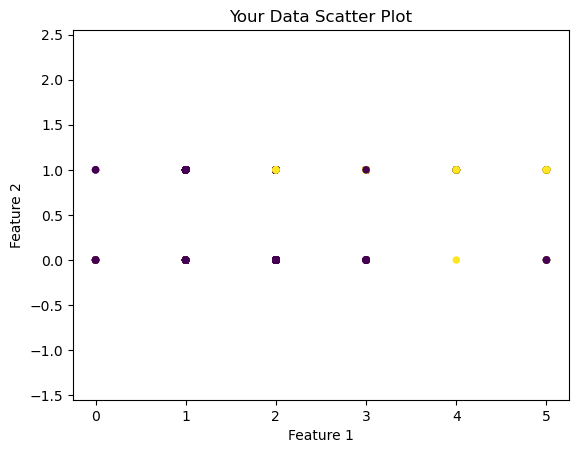

تعداد نقاط: 3479
Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


In [6]:
X_blob = X.values  
y_condition = y > y.mean() 

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_condition, linewidths=0, s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Your Data Scatter Plot")
plt.axis('equal')  # برای حفظ نسبت ابعاد
plt.show()
print("تعداد نقاط:", X.shape[0])
print(data.isnull().sum())

In [7]:
# As always, we instantiate our PCA model. By default all directions are kept.
from sklearn.decomposition import PCA
pca = PCA()

In [8]:
# Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``
pca.fit(X_blob)

PCA()

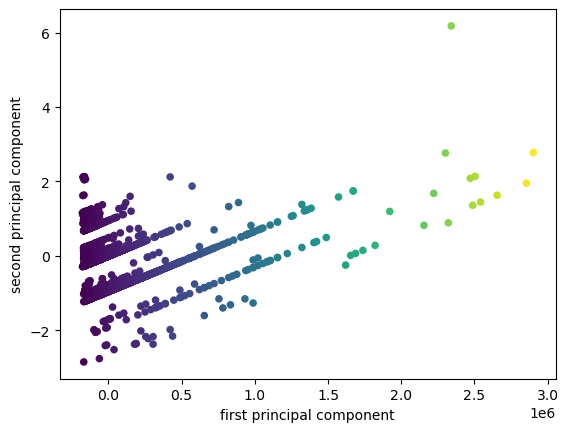

In [9]:
# Then we can transform the data, projected on the principal components:
X_pca = pca.transform(X_blob)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");

In [10]:
pca = PCA(n_components=1).fit(X_blob)

In [11]:
X_blob.shape

(3479, 5)

In [12]:
pca.transform(X_blob).shape

(3479, 1)